In [2]:
import numpy as np
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import pandas as pd

from imblearn.under_sampling import CondensedNearestNeighbour

In [13]:
#Load data

data = pd.read_csv('kdd2004.csv').sample(10000)

data.head()

,0,1,2,3,4,5,6,7,8,9,...,65,66,67,68,69,70,71,72,73,target
31423,51.33,29.31,0.74,26.5,-3.5,599.2,0.77,-0.44,-5.0,-50.0,...,776.3,0.07,2.45,5.0,-43.0,433.9,-0.21,0.43,0.34,-1
29469,41.59,28.57,1.16,1.0,-25.0,452.5,0.76,-1.17,-20.0,-44.0,...,131.9,2.05,-0.32,-3.0,-37.0,59.4,-0.11,-0.07,-0.43,-1
142953,52.17,25.81,1.02,22.5,18.5,1305.1,0.88,2.50,35.5,-74.5,...,1667.8,-0.63,3.36,15.0,-43.0,174.7,0.31,-0.09,0.52,-1
138734,54.40,33.82,1.18,15.0,-12.0,997.2,-0.16,-0.32,-15.0,-55.5,...,710.9,-0.65,0.75,10.0,-54.0,521.2,-1.23,0.37,-0.04,-1
87828,49.57,31.58,0.29,17.5,0.5,614.1,-0.34,-0.46,-15.5,-49.0,...,846.2,-1.08,1.42,14.0,-44.0,141.8,0.11,0.23,-0.48,-1


In [14]:
#Number of samples of each class
data['target'].value_counts()

-1    9907
 1      93
Name: target, dtype: int64

In [15]:
#Proportion of each class
data['target'].value_counts()/len(data['target'])

-1    0.9907
 1    0.0093
Name: target, dtype: float64

In [20]:
#separate dataset into train and test 

x_train,x_test,y_train,y_test=train_test_split(data.drop(labels=['target'],axis=1),
                                              data['target'],
                                              test_size=0.3,
                                              random_state=0)

In [21]:
x_train.shape

(7000, 74)

In [22]:
x_test.shape

(3000, 74)

In [24]:
y_train.value_counts()/len(y_train)

-1    0.990571
 1    0.009429
Name: target, dtype: float64

In [25]:
y_test.value_counts()/len(y_test)

-1    0.991
 1    0.009
Name: target, dtype: float64

# Condensed Nearest Neighbours

In [34]:
def condensed_nearest_neighbour(x,y,n_neighbours):
    '''
    x - inputs 
    y - outputs
    n_neighbours -number of neighbours
    '''
    cnn=CondensedNearestNeighbour(
                    sampling_strategy='auto',
                    random_state=0,
                    n_neighbors=n_neighbours)
    x_resampled,y_resampled=cnn.fit_resample(x_train,y_train)
    return x_resampled,y_resampled

In [35]:
#Resampling the dataset

x_resampled,y_resampled=condensed_nearest_neighbour(x_train,y_train,1)

In [36]:
x_resampled.shape

(348, 74)

In [37]:
y_resampled.shape

(348,)

In [ ]:
sns.scatterplot(data=X_train,
                x="0",
                y="1",
                hue=y_train)

[Text(0.5, 1.0, 'Original dataset')]

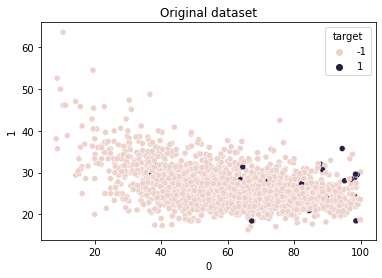

In [48]:
sns.scatterplot(data=x_train.sample(2000,random_state=0),
               x="0",
               y="1",
               hue=y_train).set(title="Original dataset")

[Text(0.5, 1.0, 'Resampled dataset')]

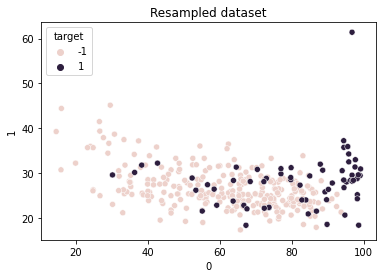

In [44]:
sns.scatterplot(data=x_resampled,
               x="0",
               y="1",
               hue=y_resampled).set(title="Resampled dataset")

In [49]:
#function to train random forest model 

def train_evaluate_randomforest(x_train,x_test,y_train,y_test):
    rf=RandomForestClassifier(n_estimators=200,random_state=39,max_depth=4)
    rf.fit(x_train,y_train)
    
    pred=rf.predict_proba(x_test)
    result=roc_auc_score(y_test,pred[:,1])
    return result

In [55]:
print('Test set')
print('')
print('Original dataset')
print('Random Forests roc-auc: {}'.format(train_evaluate_randomforest(x_train,x_test,y_train,y_test)))
print('')
print("Resampled dataset")
print('Random Forests roc-auc: {}'.format(train_evaluate_randomforest(x_resampled,x_test,y_resampled,y_test)))

Test set

Original dataset
Random Forests roc-auc: 0.9642710318795081

Resampled dataset
Random Forests roc-auc: 0.9772022274544978


In [78]:
#Varying the number of neighbours

n_neighbours=np.arange(1,11)
results=[]

for n in n_neighbours:
    n=int(n)
    x_resampled,y_resampled=condensed_nearest_neighbour(x_train,y_train,n)
    score=train_evaluate_randomforest(x_resampled,x_test,y_resampled,y_test)
    print(score)
    results=results+[score]
    


0.9772022274544978
0.9883768733415556
0.9800176900748714
0.984203510607816
0.9807402424287726
0.9844900399895354
0.9814503369834685
0.9815998305739309
0.9781739357925028
0.9775385880330381
